# King County Dataset Linear Regression Model 15

### Adjustments for this model:
    Start with getting rid of 'id'
    Then deal with the NaN's in 'view', 'yr_renovated', 'waterfront', and 'sqft_basement'
    Change "?" in 'sqft_basement', change it to a float.
    Take care of outlier in 'bedrooms', 
    Are there outliers in theres?  'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15'
    Deal with the 'date' feature?  - I still don't know how!
    Bin categorical data: 'view', 'grade', 'sqft_basement', 'yr_renovated', 'waterfront', 'condition', 'zipcode'
    Lot Transform right skewed data: 'sqft_above', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15' 
    Max/Min: None.
    Standardization: 'sqft_above', 'sqft_living','sqft_lot','sqft_living15', 'sqft_lot15'
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")

In [2]:
# This time I'm going to try to not adjust the original, just a new series called king_features
king_features = pd.read_csv("kc_house_data.csv")

In [3]:
king_features.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Missing Data

In [4]:
# Change "?" in 'sqft_basement' to '0';
king_features.sqft_basement = king_features.sqft_basement.replace(to_replace = '?', value = '0')

In [5]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
king_features.waterfront.fillna(value=king_features.waterfront.median(), inplace = True)
king_features.view.fillna(value=king_features.view.median(), inplace = True)
king_features.yr_renovated.fillna(value=king_features.yr_renovated.median(), inplace = True)
king_features.sqft_basement.fillna(value=king_features.sqft_basement.median(), inplace = True)


In [6]:
# Change 'date' feature to float
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].map(dt.datetime.toordinal)

In [7]:
# Change 'sqft_basement' from an object to a float:
king_features['sqft_basement'] = king_features['sqft_basement'].astype(float)

In [8]:
king_features = king_features.drop(["id"], axis=1)

### Outliers

In [9]:
# Change outlier '33' to '3' in 'bedrooms';
king_features.at[15856,'bedrooms'] = 3

In [10]:
# Drop additional outliers using three standard deviations above the mean.
king_features = king_features[king_features.bathrooms < 4.42]
king_features = king_features[king_features.bedrooms < 6.08]
king_features = king_features[king_features.sqft_living < 4834.64]
king_features = king_features[king_features.sqft_lot < 139337.32]
king_features = king_features[king_features.sqft_above < 4271.87]
king_features = king_features[king_features.sqft_living15 < 4042.31]
king_features = king_features[king_features.sqft_lot15 < 94581.61]

### Categorical Data - Binning

In [11]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900, 2000, 2010, 2020]
bins_yr_renovated = pd.cut(king_features['yr_renovated'], bins_A)
bins_yr_renovated = bins_yr_renovated.cat.as_ordered()

yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr-ren")
king_features = king_features.drop(["yr_renovated"], axis=1)
king_features = pd.concat([king_features, yr_renovated_dummy], axis=1)

In [12]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(king_features['sqft_basement'], bins_B)
bins_sqft_basement = bins_sqft_basement.cat.as_ordered()

# Changed to drop_first=False but have to leave it out. 
sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
king_features = king_features.drop(["sqft_basement"], axis=1)
king_features = pd.concat([king_features, sqft_basement_dummy], axis=1)

In [13]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(king_features['view'], bins_C)
bins_view = bins_view.cat.as_ordered()

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
king_features = king_features.drop(["view"], axis=1)
king_features = pd.concat([king_features, view_dummy], axis=1)

In [14]:
# Create bins for 'grade' based on the values observed. 3 values will result in 2 bins
bins_D = [0, 5, 8, 10, 13]
bins_grade = pd.cut(king_features['grade'], bins_D)
bins_grade = bins_grade.cat.as_ordered()

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade")
king_features = king_features.drop(["grade"], axis=1)
king_features = pd.concat([king_features, grade_dummy], axis=1)

In [15]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(king_features['waterfront'], bins_E)
bins_waterfront = bins_waterfront.cat.as_ordered()

waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
king_features = king_features.drop(["waterfront"], axis=1)
king_features = pd.concat([king_features, waterfront_dummy], axis=1)

In [16]:
# Create bins for 'condition' based on the values observed. 6 values will result in 5 bins
bins_G = [0, 1, 2, 3, 4, 5]
bins_condition = pd.cut(king_features['condition'], bins_G)
bins_condition = bins_condition.cat.as_ordered()

condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition")
king_features = king_features.drop(["condition"], axis=1)
king_features = pd.concat([king_features, condition_dummy], axis=1)

In [17]:
# Create bins for 'zipcode' based on the values observed. 4 values will result in 3 bins
bins_H = [98000, 98100, 98200, 98300]
bins_zipcode = pd.cut(king_features['zipcode'], bins_H)
bins_zipcode = bins_zipcode.cat.as_ordered()

zipcode_dummy = pd.get_dummies(bins_zipcode, prefix="new_zipcode")
king_features = king_features.drop(["zipcode"], axis=1)
king_features = pd.concat([king_features, zipcode_dummy], axis=1)

### Log Transformation: These features have right skewed histograms
'sqft_above', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15'

In [18]:
# Perform log transformation
logabove = np.log(king_features["sqft_above"])
loglot = np.log(king_features["sqft_lot"])
logliving = np.log(king_features["sqft_living"])
loglivingnear = np.log(king_features["sqft_living15"])
loglotnear = np.log(king_features["sqft_lot15"])

# Switch the Standardization into the original data
king_features["sqft_above"] = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
king_features["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
king_features["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
king_features["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
king_features["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))

In [29]:
y = pd.DataFrame(king_features, columns = ['price'])
X = king_features.drop(["price", 'date', 'sqft_lot', 'floors', "new_zipcode_(98200, 98300]"], axis=1)

In [30]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1789.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:33:12   Log-Likelihood:            -2.7671e+05
No. Observations:               20570   AIC:                         5.535e+05
Df Residuals:                   20546   BIC:                         5.537e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
bedrooms                   -1.705e+04   1829.428     -9.318      0.000   -2.06e+04   -1.35e+04
bathrooms                   5.096e+04   2920.586     17.449      0.000    4.52e+04    5.67e+04
sqft_living                 2.192e+04   4743.024      4.621      0.000    1.26e+04    3.12e+04
sqft_above                  7.235e+04   4496.938     16.089      0.000    6.35e+04    8.12e+04
yr_built                   -1904.3417     62.201    -30.616      0.000   -2026.260   -1782.424
lat                         5.879e+05   9349.426     62.876      0.000     5.7e+05    6.06e+05
long                       -7.251e+04   1.27e+04     -5.692      0.000   -9.75e+04   -4.75e+04
sqft_living15               4.813e+04   1924.194     25.012      0.000    4.44e+04    5.19e+04
sqft_lot15                 -2.468e+04   1473.396    -16.751      0.000   -2.76e+04   -2.18e+04
yr-ren_(0, 1900]           -6.044e-06   3.16e-07    -19.127      0.000   -6.66e-06   -5.42e-06
yr-ren_(1900, 2000]         3.705e+04   9160.025      4.045      0.000    1.91e+04     5.5e+04
yr-ren_(2000, 2010]         1.449e+05   1.24e+04     11.710      0.000    1.21e+05    1.69e+05
yr-ren_(2010, 2020]         7.397e+04   1.49e+04      4.976      0.000    4.48e+04    1.03e+05
sqft_base_(100, 5000]       6.196e+04   4992.165     12.411      0.000    5.22e+04    7.17e+04
new_view_(2, 4]             1.781e+05   7479.604     23.815      0.000    1.63e+05    1.93e+05
new_grade_(0, 5]            -8.75e+06   4.46e+05    -19.597      0.000   -9.62e+06   -7.87e+06
new_grade_(5, 8]           -8.744e+06   4.47e+05    -19.558      0.000   -9.62e+06   -7.87e+06
new_grade_(8, 10]          -8.539e+06   4.47e+05    -19.090      0.000   -9.42e+06   -7.66e+06
new_grade_(10, 13]         -8.174e+06   4.48e+05    -18.255      0.000   -9.05e+06    -7.3e+06
new_waterfront_(0.5, 1.0]   5.041e+05   1.74e+04     28.946      0.000     4.7e+05    5.38e+05
new_condition_(0, 1]        -6.91e+06   3.59e+05    -19.262      0.000   -7.61e+06   -6.21e+06
new_condition_(1, 2]       -6.867e+06   3.58e+05    -19.192      0.000   -7.57e+06   -6.17e+06
new_condition_(2, 3]       -6.851e+06   3.58e+05    -19.154      0.000   -7.55e+06   -6.15e+06
new_condition_(3, 4]       -6.809e+06   3.58e+05    -19.028      0.000   -7.51e+06   -6.11e+06
new_condition_(4, 5]       -6.768e+06   3.58e+05    -18.924      0.000   -7.47e+06   -6.07e+06
new_zipcode_(98000, 98100]  -1.71e+07   8.93e+05    -19.152      0.000   -1.89e+07   -1.54e+07
new_zipcode_(98100, 98200]  -1.71e+07   8.95e+05    -19.101      0.000   -1.89e+07   -1.53e+07
==============================================================================
Omnibus:                     9627.391   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118751.

In [21]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15427 5143 15427 5143


In [22]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [24]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 28149550410.240177
Test Mean Squarred Error: 28811255940.07311


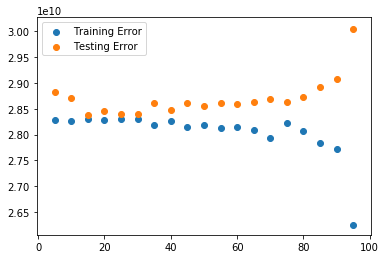

In [25]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-28691107289.894726

## Results

######  R^2 = 0.667, P-Values are perfect, MSE's are reasonable